In [121]:
import numpy as np
import matplotlib.pyplot as plt
import LSE_net
import torch
import importlib
import pickle
import datetime
from torchinfo import summary
import utils


In [122]:
importlib.reload(LSE_net)
lse_data = torch.load('logSumExp_models/lse_2025_4_30__14_6_10.pth', weights_only=False)
n_inputs = lse_data['n_inputs']
n_outputs = lse_data['n_outputs']
layers = lse_data['layers']
weights = lse_data['model_state_dict']
io_scale = lse_data['io_scale']
lse_net = LSE_net.dnn(n_inputs, n_outputs, layers)
# lse_net.to(device)
lse_net.load_state_dict(weights)
lse_net.eval()
for p in lse_net.parameters():
    p.requires_grad = False
print(f'n_inputs: {n_inputs}\nn_outputs: {n_outputs}\nlayers: {layers}\nio_scale: {io_scale}\nLSE_net:\n{summary(lse_net)}')

n_inputs: 3
n_outputs: 1
layers: [20, 20, 10]
io_scale: 1
LSE_net:
Layer (type:depth-idx)                   Param #
dnn                                      --
├─ModuleList: 1-1                        --
│    └─Linear: 2-1                       (80)
│    └─ReLU: 2-2                         --
│    └─Linear: 2-3                       (420)
│    └─ReLU: 2-4                         --
│    └─Linear: 2-5                       (210)
│    └─ReLU: 2-6                         --
│    └─Linear: 2-7                       (11)
Total params: 721
Trainable params: 0
Non-trainable params: 721


In [123]:
importlib.reload(utils)
d_min = np.random.uniform(0.0, 1.0)
F_min = np.random.uniform(d_min, 1.0)
b_min = 1e-3
b_max = 1e5
b_grow = 1.1
b_arr = utils.createBetaArray(b_min, b_max, b_grow).view(-1,1)


In [124]:
F_min_arr = F_min * torch.ones(len(b_arr), dtype=torch.float32).view(-1,1)
d_min_arr = d_min * torch.ones(len(b_arr), dtype=torch.float32).view(-1,1)
log_b_arr = torch.log(b_arr)/torch.log(torch.tensor([10]))
In = torch.cat((F_min_arr, d_min_arr, log_b_arr), axis=1)
In

tensor([[ 0.9343,  0.7199, -3.0000],
        [ 0.9343,  0.7199, -2.9586],
        [ 0.9343,  0.7199, -2.9172],
        [ 0.9343,  0.7199, -2.8758],
        [ 0.9343,  0.7199, -2.8344],
        [ 0.9343,  0.7199, -2.7930],
        [ 0.9343,  0.7199, -2.7516],
        [ 0.9343,  0.7199, -2.7103],
        [ 0.9343,  0.7199, -2.6689],
        [ 0.9343,  0.7199, -2.6275],
        [ 0.9343,  0.7199, -2.5861],
        [ 0.9343,  0.7199, -2.5447],
        [ 0.9343,  0.7199, -2.5033],
        [ 0.9343,  0.7199, -2.4619],
        [ 0.9343,  0.7199, -2.4205],
        [ 0.9343,  0.7199, -2.3791],
        [ 0.9343,  0.7199, -2.3377],
        [ 0.9343,  0.7199, -2.2963],
        [ 0.9343,  0.7199, -2.2549],
        [ 0.9343,  0.7199, -2.2135],
        [ 0.9343,  0.7199, -2.1721],
        [ 0.9343,  0.7199, -2.1308],
        [ 0.9343,  0.7199, -2.0894],
        [ 0.9343,  0.7199, -2.0480],
        [ 0.9343,  0.7199, -2.0066],
        [ 0.9343,  0.7199, -1.9652],
        [ 0.9343,  0.7199, -1.9238],
 

In [125]:
Out = lse_net(In)
Out

tensor([[0.9270],
        [0.9270],
        [0.9270],
        [0.9270],
        [0.9270],
        [0.9271],
        [0.9271],
        [0.9271],
        [0.9271],
        [0.9272],
        [0.9272],
        [0.9272],
        [0.9272],
        [0.9272],
        [0.9248],
        [0.9239],
        [0.9240],
        [0.9242],
        [0.9243],
        [0.9244],
        [0.9243],
        [0.9243],
        [0.9242],
        [0.9241],
        [0.9240],
        [0.9239],
        [0.9238],
        [0.9237],
        [0.9236],
        [0.9235],
        [0.9234],
        [0.9233],
        [0.9232],
        [0.9270],
        [0.9290],
        [0.9219],
        [0.9223],
        [0.9234],
        [0.9246],
        [0.9273],
        [0.9274],
        [0.9275],
        [0.9275],
        [0.9276],
        [0.9277],
        [0.9277],
        [0.9260],
        [0.9262],
        [0.9261],
        [0.9261],
        [0.9261],
        [0.9261],
        [0.9260],
        [0.9260],
        [0.9260],
        [0

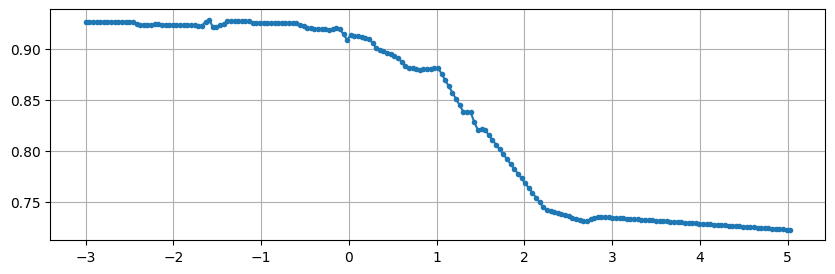

In [126]:
plt.figure(figsize=(10,3))
plt.plot(log_b_arr.numpy().flatten(), Out.numpy().flatten(), marker='.')
plt.grid()
plt.show()